In [12]:
import numpy as np
import pandas as pd

from load_data import load_data
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification
import utils.variables as v

from pyriemann.utils.viz import plot_confusion_matrix


In [13]:
data_type = 'new_ica'
label_type = 'stai'

train_data, test_data, val_data, train_labels, test_labels, val_labels = load_data(data_type, label_type, epoched = True, binary = True)

ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002
ERROR:root:1) Failed to read data for recording P010_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_001


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P013_S001_002
ERROR:root:1) Failed to read data for recording P020_S001_001
ERROR:root:1) Failed to read data for recording P023_S002_002
ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs: 
 ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016

In [14]:
probs_EEGNet = EEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

True
new_ica
Epoch 1/300


KeyboardInterrupt: 

[0 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[2264 1036]
 [1763  637]]
[50.89 56.22 38.08]


<AxesSubplot:title={'center':'Confusion matrix for EEGNet on ICA data'}, xlabel='Predicted label', ylabel='True label'>

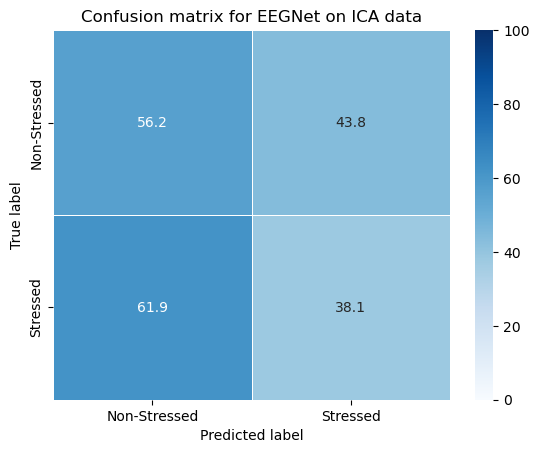

In [ ]:
preds_EEGNet = probs_EEGNet.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)

plot_confusion_matrix(preds_EEGNet, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for EEGNet on ICA data')

In [ ]:
probs_TSGL = EEGNet_TSGL_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.03131, saving model to /tmp\checkpoint.h5
413/413 - 72s - loss: 1.2047 - accuracy: 0.6973 - val_loss: 1.0313 - val_accuracy: 0.6425 - 72s/epoch - 174ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 1.03131
413/413 - 73s - loss: 0.7103 - accuracy: 0.8936 - val_loss: 1.3192 - val_accuracy: 0.6046 - 73s/epoch - 177ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 1.03131
413/413 - 76s - loss: 0.5425 - accuracy: 0.9195 - val_loss: 1.5403 - val_accuracy: 0.6290 - 76s/epoch - 185ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 1.03131
413/413 - 78s - loss: 0.4195 - accuracy: 0.9444 - val_loss: 2.0542 - val_accuracy: 0.6290 - 78s/epoch - 188ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 1.03131
413/413 - 74s - loss: 0.3960 - accuracy: 0.9452 - val_loss: 1.5726 - val_accuracy: 0.6156 - 74s/epoch - 178ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 1.03131
413/413 - 83s - loss: 0.3489 

[[0.39211366 0.6078864 ]
 [0.57004416 0.42995587]
 [0.7428666  0.25713348]
 ...
 [0.98333436 0.01666567]
 [0.9812373  0.0187627 ]
 [0.9636203  0.03637971]]
[1 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[1719 1581]
 [1370 1030]]
[48.23 55.65 39.45]


<AxesSubplot:title={'center':'Confusion matrix for TSGL on ICA data'}, xlabel='Predicted label', ylabel='True label'>

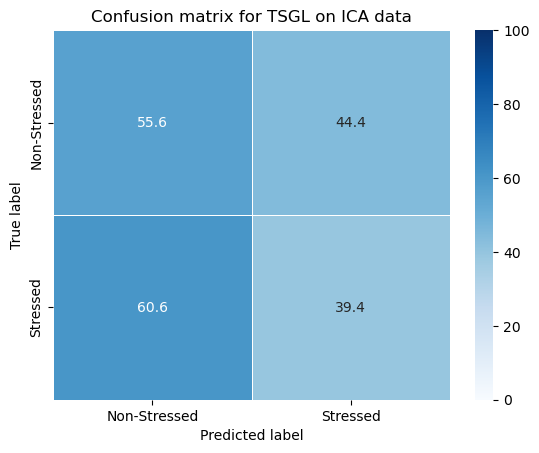

In [ ]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

plot_confusion_matrix(preds_TSGL, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for TSGL on ICA data')

In [ ]:
probs_Deep = EEGNet_DeepConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.44949, saving model to /tmp\checkpoint.h5
413/413 - 21s - loss: 0.6007 - accuracy: 0.7744 - val_loss: 1.4495 - val_accuracy: 0.6979 - 21s/epoch - 52ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 1.44949
413/413 - 19s - loss: 0.1365 - accuracy: 0.9686 - val_loss: 1.9505 - val_accuracy: 0.6521 - 19s/epoch - 46ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 1.44949
413/413 - 19s - loss: 0.0756 - accuracy: 0.9820 - val_loss: 3.0483 - val_accuracy: 0.6846 - 19s/epoch - 46ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 1.44949
413/413 - 19s - loss: 0.0587 - accuracy: 0.9854 - val_loss: 2.7182 - val_accuracy: 0.6590 - 19s/epoch - 45ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 1.44949
413/413 - 19s - loss: 0.0463 - accuracy: 0.9889 - val_loss: 2.1040 - val_accuracy: 0.6637 - 19s/epoch - 46ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 1.44949
413/413 - 19s - loss: 0.0436 - acc

[[8.22900236e-01 2.36023977e-01]
 [9.02649343e-01 1.24495834e-01]
 [8.54743004e-01 1.82194188e-01]
 ...
 [9.99183476e-01 5.51787962e-04]
 [9.98423755e-01 1.07745233e-03]
 [9.98615742e-01 8.59286229e-04]]
[0 0 0 ... 0 0 0]
[[1. 1. 1. ... 0. 0. 0.]]

 Confusion matrix:
[[1945 1355]
 [1625  775]]
[47.72 54.48 36.38]


<AxesSubplot:title={'center':'Confusion matrix for DeepConvNet on New_ICA data'}, xlabel='Predicted label', ylabel='True label'>

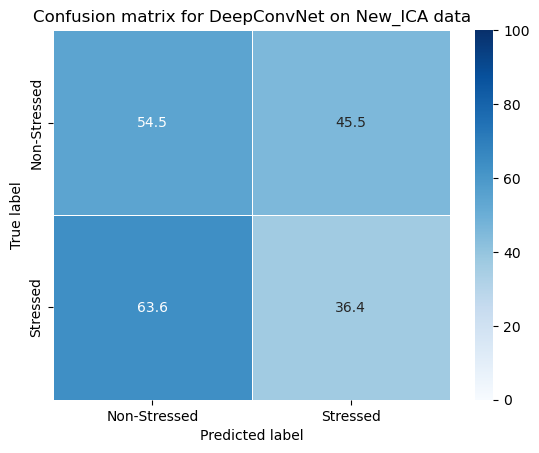

In [ ]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)
plot_confusion_matrix(preds_Deep, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for DeepConvNet on New_ICA data')

In [ ]:
probs_Shallow = EEGNet_ShallowConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.91606, saving model to /tmp\checkpoint.h5
413/413 - 14s - loss: 0.3771 - accuracy: 0.8778 - val_loss: 0.9161 - val_accuracy: 0.7356 - 14s/epoch - 33ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.91606
413/413 - 12s - loss: 0.0367 - accuracy: 0.9915 - val_loss: 1.0871 - val_accuracy: 0.7544 - 12s/epoch - 30ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.91606
413/413 - 12s - loss: 0.0210 - accuracy: 0.9946 - val_loss: 1.2214 - val_accuracy: 0.7135 - 12s/epoch - 30ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.91606
413/413 - 12s - loss: 0.0175 - accuracy: 0.9960 - val_loss: 1.4156 - val_accuracy: 0.7421 - 12s/epoch - 30ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.91606
413/413 - 12s - loss: 0.0115 - accuracy: 0.9976 - val_loss: 1.3029 - val_accuracy: 0.7535 - 12s/epoch - 29ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.91606
413/413 - 12s - loss: 0.0065 - acc

[[0.7180625  0.20691341]
 [0.41300786 0.28644618]
 [0.81810886 0.07328607]
 ...
 [0.8570372  0.09127623]
 [0.6757814  0.37289137]
 [0.5810559  0.29089224]]
[0 0 0 ... 0 0 0]
[[1. 1. 1. ... 0. 0. 0.]]

 Confusion matrix:
[[1813 1487]
 [1610  790]]
[45.67 52.97 34.69]


<AxesSubplot:title={'center':'Confusion matrix for ShallowConvNet on ICA data'}, xlabel='Predicted label', ylabel='True label'>

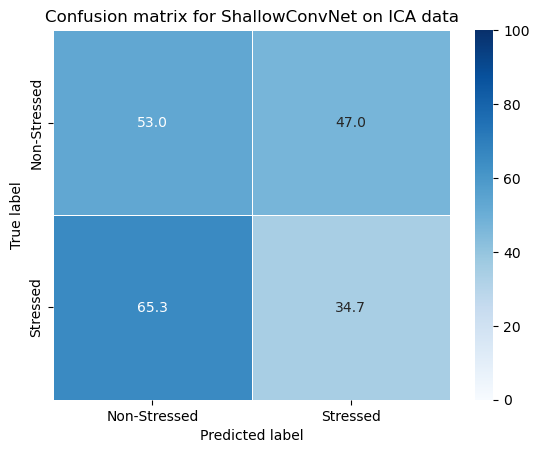

In [ ]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)

plot_confusion_matrix(preds_Shallow, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for ShallowConvNet on ICA data')